In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

sns.set()

In [2]:
def bold(string):
    chr_start = "\033[1m"
    chr_end = "\033[0m"
    print (chr_start + string + chr_end)
    
def underline(string):
    chr_start = "\033[4m"
    chr_end = "\033[0m"
    print(chr_start + string + chr_end)

In [3]:
# Create a dictionary that associates each fund with a distinct color from a color spectrum, ensuring uniform coloring in visual representations.
def color_lib(categories):
    
    c_scale = cm.rainbow(np.linspace(0,1,len(categories)))
    c_dict = {}

    for i,c in zip(categories,c_scale):
        c_dict[i] = c
        
    return c_dict

In [4]:
df_QL = pd.read_csv('../Results/QL_results.csv')
df_QL.head()

,winner,turns,win_rate
0,Human,64,0.000000
1,AI,26,0.500000
2,Human,14,0.333333
3,Human,19,0.250000
4,AI,67,0.400000


In [5]:
df = pd.read_csv('../Results/results.csv')
df.head()

,winner,turns,win_rate
0,Human,38,0.0
1,Human,19,0.0
2,Human,34,0.0
3,Human,21,0.0
4,Human,16,0.0


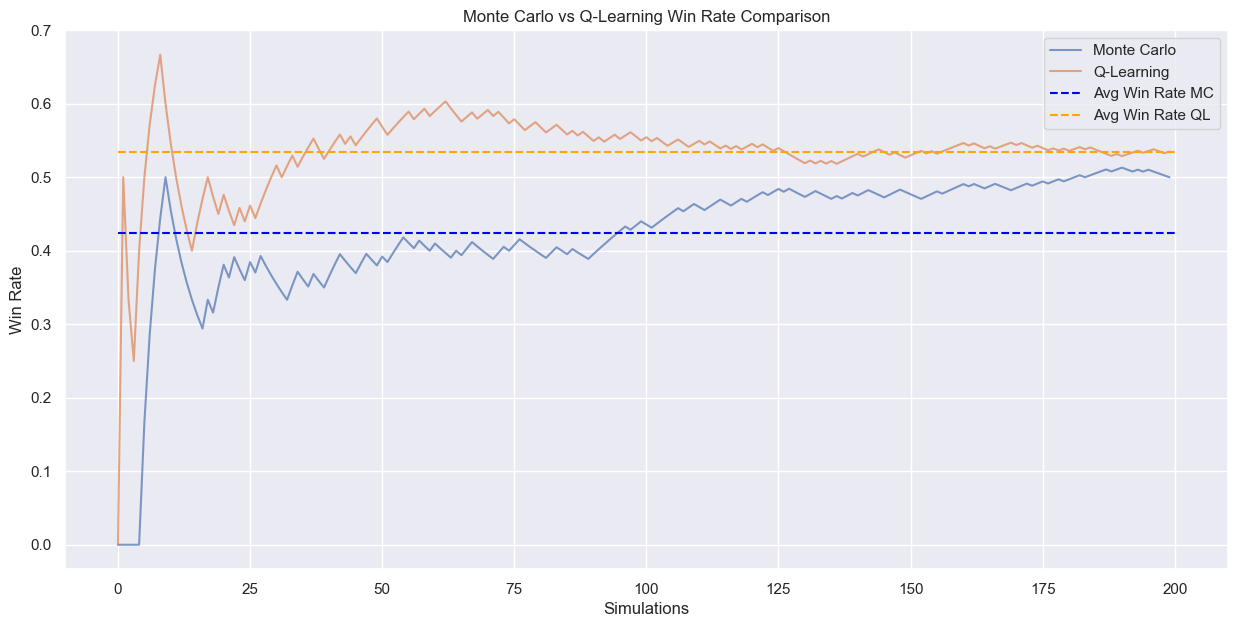

Monte Carlo - Average Win Rate: 42.42%, Total Wins: 100
Q-Learning - Average Win Rate: 53.43%, Total Wins: 107


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into two dataframes: df_MC (Monte Carlo) and df_QL (Q-Learning)

# Calculate average win rate for each model
avg_win_rate_MC = df['win_rate'].mean()
avg_win_rate_QL = df_QL['win_rate'].mean()

# Total wins for each model
total_wins_MC = df[df['winner'] == 'AI']['winner'].count()
total_wins_QL = df_QL[df_QL['winner'] == 'AI']['winner'].count()

# Plot win rates over time
plt.figure(figsize=(15, 7))

plt.plot(df.index, df['win_rate'], label='Monte Carlo', alpha=0.7)
plt.plot(df_QL.index, df_QL['win_rate'], label='Q-Learning', alpha=0.7)

plt.hlines(avg_win_rate_MC, xmin=0, xmax=len(df), colors='blue', linestyles='dashed', label='Avg Win Rate MC')
plt.hlines(avg_win_rate_QL, xmin=0, xmax=len(df_QL), colors='orange', linestyles='dashed', label='Avg Win Rate QL')

plt.title('Monte Carlo vs Q-Learning Win Rate Comparison')
plt.xlabel('Simulations')
plt.ylabel('Win Rate')
plt.legend()
plt.show()

# Print summary
print(f"Monte Carlo - Average Win Rate: {avg_win_rate_MC:.2%}, Total Wins: {total_wins_MC}")
print(f"Q-Learning - Average Win Rate: {avg_win_rate_QL:.2%}, Total Wins: {total_wins_QL}")


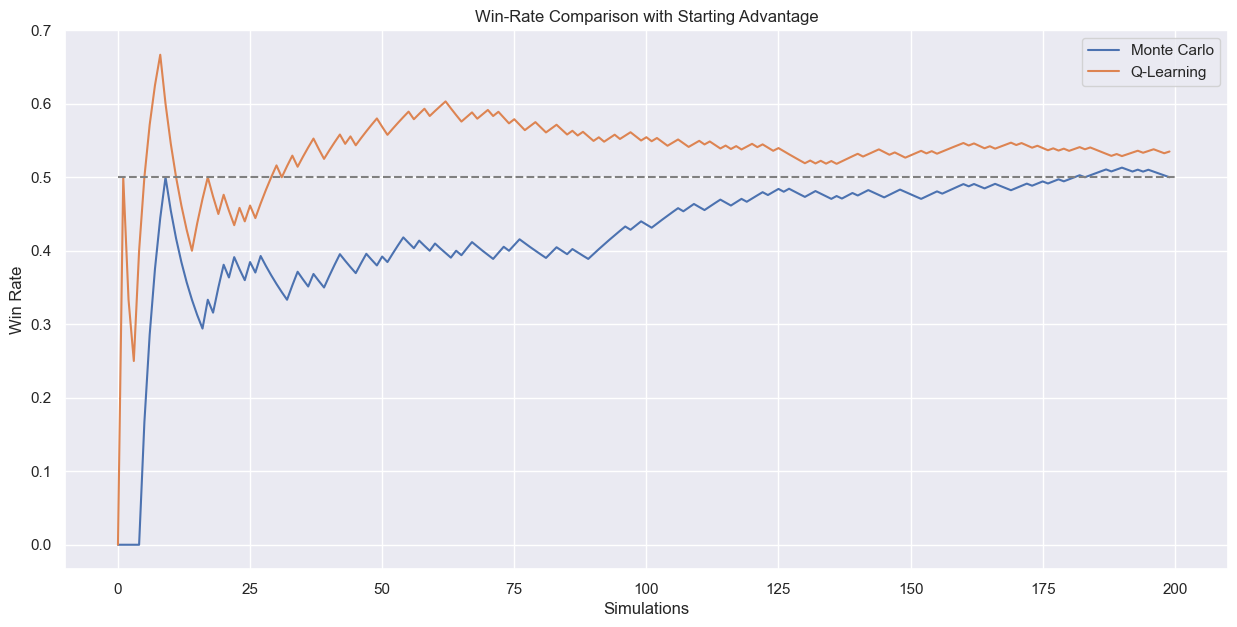

In [7]:
import matplotlib.pyplot as plt

# Assuming df and df_QL are already defined dataframes

fig = plt.figure(1, figsize=(15,7))

# Plot win rates for Monte Carlo model
plt.plot(df.index, df["win_rate"], label='Monte Carlo')

# Plot win rates for Q-Learning model
plt.plot(df_QL.index, df_QL["win_rate"], label='Q-Learning')

# Add a horizontal line at 0.5 for reference
plt.hlines(0.5, 0, max(len(df), len(df_QL)), colors="grey", linestyles="dashed")

plt.title("Win-Rate Comparison with Starting Advantage")
plt.xlabel("Simulations")
plt.ylabel("Win Rate")
plt.legend()  # Display legend to distinguish between the models
plt.show()


In [9]:
QL_q_values = pd.read_csv('../Results/QL_values.csv',index_col='id')

actions = QL_q_values.columns

QL_q_values['MAX'] = QL_q_values.max(axis=1)
QL_q_values['ID'] = QL_q_values.index
QL_q_values['HAND'] = QL_q_values['ID'].apply(lambda x: sum(eval(x)[1:]))

QL_q_values.drop(columns='ID', inplace=True)
QL_q_values.head(3)

,RED,GRE,BLU,YEL,SKI,REV,PL2,PL4,COL,MAX,HAND
id,,,,,,,,,,,
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
"('RED', 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"('RED', 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
import numpy as np
import pandas as pd

# Assuming QL_q_values is your DataFrame
q_curve = QL_q_values.copy()

# Print the columns of the DataFrame to check their names
print(q_curve.columns)

# Check if the specified columns exist in the DataFrame
expected_columns = ['HAND', 'MAX']
if not all(column in q_curve.columns for column in expected_columns):
    raise ValueError(f"Columns {expected_columns} not found in DataFrame")

# Replace 0 with NaN in specified columns
q_curve[["HAND", "MAX"]] = q_curve[["HAND", "MAX"]].replace(0, np.NaN)

# Continue with the rest of your code
q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max = pd.Series(q_curve.groupby("HAND").max()["MAX"])


Index(['RED', 'GRE', 'BLU', 'YEL', 'SKI', 'REV', 'PL2', 'PL4', 'COL', 'MAX',
       'HAND'],
      dtype='object')


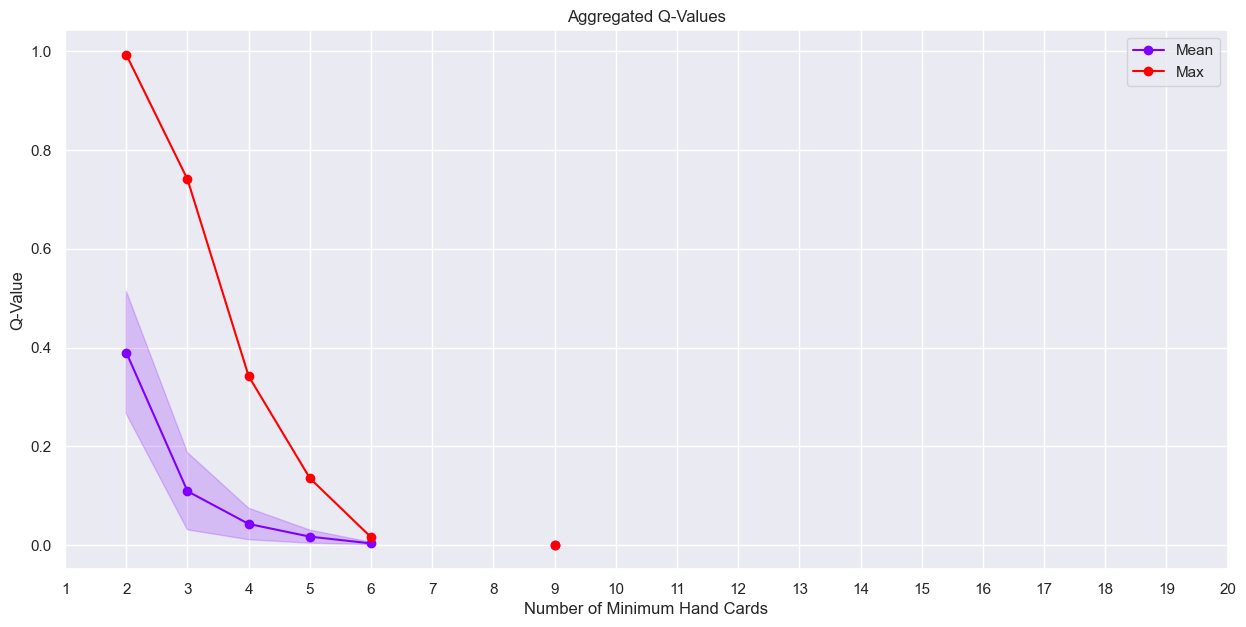

In [11]:
q_curve = QL_q_values.copy()
q_curve[["HAND","MAX"]] = q_curve[["HAND","MAX"]].replace(0, np.NaN)

q_mean = pd.Series(q_curve.groupby("HAND").mean()["MAX"])
q_max  = pd.Series(q_curve.groupby("HAND").max()["MAX"])
q_std  = pd.Series(q_curve.groupby("HAND").std()["MAX"])/2

fig = plt.figure(1, figsize=(15,7))
colors = color_lib(["Mean","Max"])

plt.plot(q_mean.index, q_mean, label="Mean", marker = "o", c = colors["Mean"])
plt.plot(q_max.index,  q_max,  label="Max",  marker = "o", c = colors["Max"])
plt.fill_between(q_mean.index, q_mean-q_std, q_mean+q_std, color = colors["Mean"], alpha=0.2)

plt.xticks(q_mean.index)
plt.xlabel("Number of Minimum Hand Cards")
plt.ylabel("Q-Value")
plt.title("Aggregated Q-Values")
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Q-values are stored in QL_q_values.csv and MC_q_values.csv
QL_q_values = pd.read_csv('../Results/QL_values.csv',index_col='id')
MC_q_values = pd.read_csv('../Results/q-values.csv',index_col='id')




In [14]:


# Function to calculate state-action coverage
def calculate_coverage(q_values):
    unique_states_actions = q_values.groupby(["RED", "GRE", "BLU", "YEL", "SKI", "REV", "PL2", "PL4", "COL"]).size().reset_index(name='count')
    total_unique_states_actions = unique_states_actions.shape[0]
    return total_unique_states_actions

# Calculate state-action coverage for both models
QL_coverage = calculate_coverage(QL_q_values)
MC_coverage = calculate_coverage(MC_q_values)

# Print the results
print(f"Q-learning State-Action Coverage: {QL_coverage} unique state-action pairs")
print(f"Monte Carlo State-Action Coverage: {MC_coverage} unique state-action pairs")


Q-learning State-Action Coverage: 186 unique state-action pairs
Monte Carlo State-Action Coverage: 100 unique state-action pairs
